# Problem 1

In [219]:
import numpy as np
from matplotlib import pyplot as plt

In [220]:
T = 2
M = 1000

In [221]:
def brownian(n):
    """
    returns (M,n) array with one process per row and corresponding steps
    """
    dT = T / n
    Z = np.random.normal(0, 1, (M, n))
    deltaW = Z*np.sqrt(dT)
    W = np.zeros((M, n+1))
    W[:, 1:] = np.cumsum(deltaW, axis=1)
    return W, deltaW

def I(W, deltaW):
    return np.sum(np.multiply(W[:, :-1], deltaW), axis=1)

def J(W, deltaW):
    return np.sum(np.multiply(W[:, 1:], deltaW), axis=1)

def K(W, deltaW):
    return (I(W, deltaW)+J(W, deltaW))/2

In [222]:
W, deltaW = brownian(10)

In [280]:
R = (W[:,-1]**2)/2
v1, v2, v3 = R-I(W, deltaW), R-J(W, deltaW), R-K(W, deltaW)

(a) Here we define $R = \frac{1}{2}W_T^2$

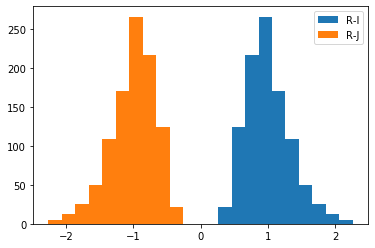

In [284]:
plt.hist(v1)
plt.hist(v2)
plt.legend(["R-I", "R-J"])

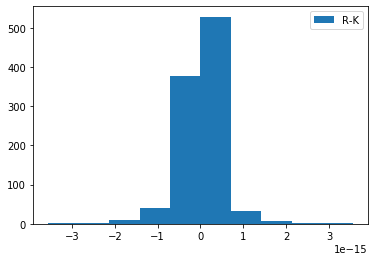

In [288]:
plt.hist(v3)
plt.legend(["R-K"])

(b)

In [286]:
print("R-I mean:", np.mean(v1))
print("R-J mean:", np.mean(v2))
print("R-K mean:", np.mean(v3))

R-I mean: 0.9989524087579871
R-J mean: -0.9989524087579872
R-K mean: -6.299218460258823e-18


As expected, $R-K=0$ (with a very small numerical error, but not related to randomness), since we can expand $K$ in a telescopic sum that sums up to $R$. $K = \frac{I+J}{2}$, which is why $I=-J$.

(c)

Taking 95% confidence intervals

In [225]:
v1_mean, v1_err  = [], []
v2_mean, v2_err  = [], []
v3_mean, v3_err  = [], []
for n in range(10,20):
    W, deltaW = brownian(n)
    R = (W[:,-1]**2)/2
    v1, v2, v3 = R-I(W, deltaW), R-J(W, deltaW), R-K(W, deltaW)
    v1_mean.append(np.mean(v1))
    v1_err.append(1.96*np.sqrt(np.var(v1)/M))
    v2_mean.append(np.mean(v2))
    v2_err.append(1.96*np.sqrt(np.var(v2)/M))
    v3_mean.append(np.mean(v3))
    v3_err.append(1.96*np.sqrt(np.var(v3)/M))

Text(0, 0.5, 'Sample mean')

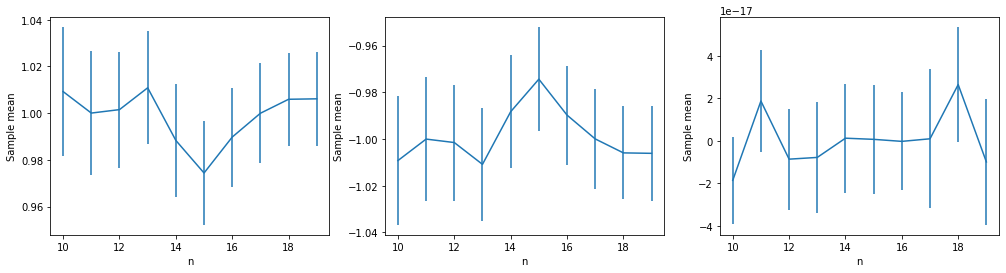

In [297]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
ax1.errorbar(list(range(10,20)), v1_mean, v1_err)
ax1.set_xlabel("n")
ax1.set_ylabel("Sample mean")
ax2.errorbar(list(range(10,20)), v2_mean, v2_err)
ax2.set_xlabel("n")
ax2.set_ylabel("Sample mean")
ax3.errorbar(list(range(10,20)), v3_mean, v3_err)
ax3.set_xlabel("n")
ax3.set_ylabel("Sample mean")

# Problem 2

In [299]:
A_mean, A_err  = [], []
B_mean, B_err  = [], []
C_mean, C_err  = [], []
for n in range(10,20):
    W, deltaW = brownian(n)
    t = np.linspace(0, T, n+1)
    
    A = np.sum(np.multiply(np.exp(t[:-1]), deltaW), axis=1)
    A_mean.append(np.mean(A))
    A_err.append(1.96*np.sqrt(np.var(A)/M))
    
    B = np.sum(np.multiply(np.exp(t[1:]), deltaW), axis=1)
    B_mean.append(np.mean(B))
    B_err.append(1.96*np.sqrt(np.var(B)/M))
    
    C = np.sum(np.multiply(np.exp((t[:-1]+t[1:])/2), deltaW), axis=1)
    C_mean.append(np.mean(C))
    C_err.append(1.96*np.sqrt(np.var(C)/M))
    
    print(f"A/B/C variances at n={n}:", np.var(A), np.var(B), np.var(C))

A/B/C variances at n=10: 20.833866970142473 31.08047729343124 25.446542580474073
A/B/C variances at n=11: 22.239119981137048 31.9921085009838 26.673513818073033
A/B/C variances at n=12: 23.282140707357833 32.49284485379123 27.504599358440313
A/B/C variances at n=13: 20.751583125514447 28.228012802123978 24.202808806652204
A/B/C variances at n=14: 23.10170254120932 30.74171735338769 26.64931537401843
A/B/C variances at n=15: 25.664065721456392 33.5071369421483 29.32455224928649
A/B/C variances at n=16: 24.063178238812615 30.89773246492276 27.267153197181834
A/B/C variances at n=17: 22.10096196714724 27.963924063831158 24.86020157172757
A/B/C variances at n=18: 23.860760400386123 29.79848363954234 26.664854742112244
A/B/C variances at n=19: 23.213060121245835 28.652519281547043 25.789778066274767


Text(0, 0.5, 'Sample mean')

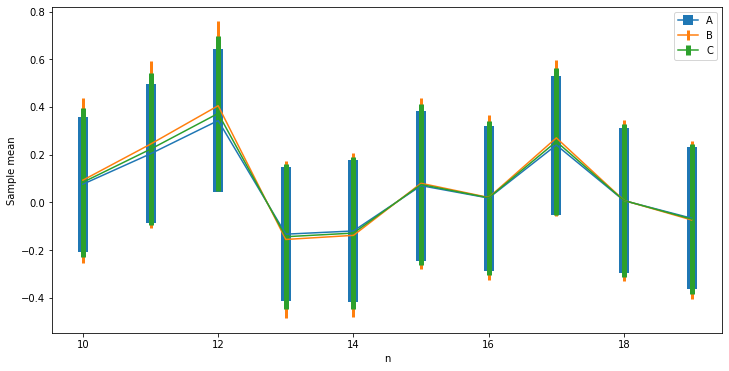

In [302]:
fig, ax = plt.subplots(figsize=(12,6))
ax.errorbar(list(range(10,20)), A_mean, A_err, elinewidth=10)
ax.errorbar(list(range(10,20)), B_mean, B_err, elinewidth=3)
ax.errorbar(list(range(10,20)), C_mean, C_err, elinewidth=5)
plt.legend(["A", "B", "C"])
ax.set_xlabel("n")
ax.set_ylabel("Sample mean")

We can see that although A, B and C get quite close as $n$ increases, A has the smallest variance and B has the highest. Also, the variances tend to the variance of $\int_0^T e^sdW_s \sim \mathcal{N}(0,26.8)$ since $\int_0^2 e^{2s}ds = \frac{e^4-1}{2} \approx 26.8$.

# Problem 3

In [313]:
means, errs = [], []
for n in range(10, 200):
    W, deltaW = brownian(n)
    A = np.sin(W[:,-1]) + (1/(2*n))*np.sum(np.sin(W[:,:-1]), axis=1)
    means.append(np.mean(A))
    errs.append(1.96*np.sqrt(np.var(A)/M))

<ErrorbarContainer object of 3 artists>

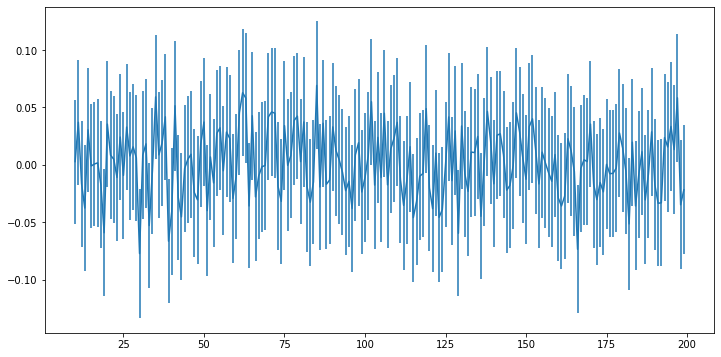

In [315]:
fig, ax = plt.subplots(figsize=(12,6))
ax.errorbar(list(range(10,200)), means, errs)

We remark that the expected value of $A_n$ is zero since it is an odd function of the process $(W_t)_{t\geq0}$.

Chanding $\frac{1}{2n}$ for $\frac{T}{2n}$ in the expression and comparing it to $\int_0^T cos(W_s)dW_s$:

In [316]:
n = 200

In [317]:
W, deltaW = brownian(n)
A = np.sin(W[:,-1]) + (T/(2*n))*np.sum(np.sin(W[:,:-1]), axis=1)
B = np.sum(np.multiply(np.cos(W[:,:-1]), deltaW), axis=1)

(array([  3.,  10.,  37., 133., 289., 343., 128.,  41.,  13.,   3.]),
 array([-0.24155762, -0.19344741, -0.1453372 , -0.09722699, -0.04911678,
        -0.00100657,  0.04710365,  0.09521386,  0.14332407,  0.19143428,
         0.23954449]),
 <a list of 10 Patch objects>)

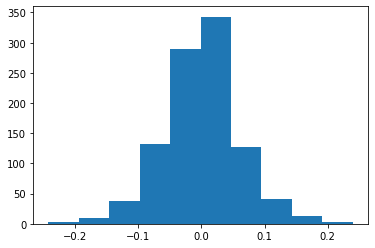

In [318]:
plt.hist(A-B)

We see that $A_n$ tends to $\int_0^T cos(W_s)dW_s$ as predicted by the Ito Lemma.